# Assignment 4 - Linear Regression with Gradient Descent
(20 points)

### Add your name(s) and EIDs below
- Student Name: Siem Yonas
- Student UT EID: sby237
- Partner Name:
- Partner UT EID:

### Grading clarifications
1. For this assignment, **all questions will be manually graded**, so you don't need to worry about the autograder :)

Your task in this assignment is to implement Multiple Linear Regression. 

We will use the New York City Taxi trip reports in the Year 2013. 
The dataset was released under the FOIL (The Freedom of Information Law) and [made public by Chris Wong](https://chriswhong.com/open-data/foil_nyc_taxi/).



# Taxi Data Set
The data set itself is a simple text file. Each taxi trip report is a different line in the file. Among other things, each trip report 
includes the starting point, the drop-off point, corresponding timestamps, and information related to the payment. The data are reported 
by the time that the trip ended, i.e., upon arriving in the order of the drop-off timestamps. 
The attributes present on each line of the file are, in order:



| index | **Attribute** | **Description** |
| --- | --- | --- |
| 0 | medallion           |  an md5sum of the identifier of the taxi - vehicle bound (Taxi ID)  | 
| 1 | hack license       |  an md5sum of the identifier for the taxi license (Driver ID)  |  
| 2 | pickup datetime    | time when the passenger(s) were picked up  |  
| 3 | dropoff datetime   | time when the passenger(s) were dropped off  | 
| 4 | trip time in secs | duration of the trip  |  
| 5 | trip distance | trip distance in miles  |  
| 6 | pickup longitude | longitude coordinate of the pickup location  |  
| 7 | pickup latitude | latitude coordinate of the pickup location  |  
| 8 | dropoff longitude | longitude coordinate of the drop-off location   |  
| 9 | dropoff latitude | latitude coordinate of the drop-off location  | 
| 10 | payment type | the payment method -credit card or cash  |  
| 11 | fare amount | fare amount in dollars  |  
| 12 | surcharge | surcharge in dollars  |  
| 13 | mta tax | tax in dollars  |  
| 14 | tip amount | tip in dollars  |  
| 15 | tolls amount | bridge and tunnel tolls in dollars  |  
| 16 | total amount | total paid amount in dollars  |  




The data files are in comma separated values (CSV) format. Example lines from the file are:

07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,\\
2013-01-01,00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,\\
40.715008,CSH,3.50,0.50,0.50,0.00,0.00,4.50

22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,\\
2013-01-01,00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,\\
CSH,27.00,0.00,0.50,0.00,0.00,27.50

0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,\\
2013-01-01,00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897\\
73.965897,40.760445,CSH,4.00,0.50,0.50,0.00,0.00,5.00



In [1]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

In [2]:
df = pd.read_csv('nyc-taxi-data.csv.bz2')
df

,07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,2013-01-01 00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,40.715008,CSH,3.50,0.50,0.50.1,0.00,0.00.1,4.50
0,22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,2013-01-01 00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,CSH,27.0,0.0,0.5,0.00,0.0,27.50
1,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.00,0.0,5.00
2,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.00,0.0,5.00
3,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.00,0.0,5.00
4,5FAA7F69213D26A42FA435CA9511A4FF,00B7691D86D96AEBD21DD9E138F90840,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.00,0.000000,0.000000,0.000000,0.000000,CRD,2.5,0.5,0.5,0.25,0.0,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,A0AFE6B722F15B7A0FDFEEA954BE316A,93D505C96BD248DC390FD47F747D762D,2013-01-01 03:44:00,2013-01-01 03:46:00,120,0.79,-73.963593,40.710941,-74.027779,40.629894,CSH,4.5,0.5,0.5,0.00,0.0,5.50
49995,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.775490,CRD,10.0,0.5,0.5,2.10,0.0,13.10
49996,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49997,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.00,0.0,18.50


# Q1

The dataset is a real-world dataset and many records are incorrect and wrong. For this question, you will **implement and describe at least 4 data clean up tasks** on this data set. **(4 points)**

For example, you can define to remove lines with the following property: if a taxi trip (one of the data rows) has a travel distance less than 1 mile and total fare of over $20, then it is an wrong record. 

Another example is that you would expect to have a float number (e.g., index 12 to 16) and then you got a String in that position. You can remove such lines from your data. 

Perform the following cleanup tasks:
1. Add column headers based on the description above (no need to describe).
2. Drop rows with a travel distance < 1 mile and a total fare > $20 (no need to describe). Both conditions need to be met.
3. Your own task (please describe your task in a comment/cell).
4. Your own task (please describe your task in a comment/cell).


_Type your answer here, replacing this text._

<!-- BEGIN QUESTION -->



In [3]:
# Cleanup task 1

# Recover the row made a header
extra_row = df.columns.to_frame().T

# New column names
col_names = ["medallion",
             "hack_license",
             "pickup_datetime",
             "dropoff_datetime",
             "trip_time",
             "trip_distance",
             "pickup_longitude",
             "pickup_latitude",
             "dropoff_longitude",
             "dropoff_latitude",
             "payment_type",
             "fare_amount",
             "surcharge",
             "mta_tax",
             "tip_amount",
             "tolls_amount",
             "total_amount"]

# Add back new row, repair indicies, and set new columns names
df2 = pd.concat([df, extra_row]).reset_index(drop=True).set_axis(col_names, axis=1)

df2

,medallion,hack_license,pickup_datetime,dropoff_datetime,trip_time,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,2013-01-01 00:02:00,2013-01-01 00:02:00,0,0.0,0.0,0.0,0.0,0.0,CSH,27.0,0.0,0.5,0.0,0.0,27.5
1,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.0,0.0,5.0
2,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.0,0.0,5.0
3,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.0,0.0,5.0
4,5FAA7F69213D26A42FA435CA9511A4FF,00B7691D86D96AEBD21DD9E138F90840,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.0,0.0,0.0,0.0,0.0,CRD,2.5,0.5,0.5,0.25,0.0,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.77549,CRD,10.0,0.5,0.5,2.1,0.0,13.1
49996,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49997,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.0,0.0,18.5
49998,A3162ED937438746E5269909C0E5AAA1,8313CA0A78F4404DCEB35FD6D8CEEB66,2013-01-01 03:37:00,2013-01-01 03:46:00,540,2.11,-73.904488,40.771713,-73.930023,40.764332,CSH,9.0,0.5,0.5,0.0,0.0,10.0


In [4]:
# Cleanup task 2
indicies_to_drop = df2[(df2.trip_distance.astype("float") < 1) & (df2.total_amount.astype("float") > 20)].index

df3 = df2.drop(indicies_to_drop) 

df3

,medallion,hack_license,pickup_datetime,dropoff_datetime,trip_time,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
1,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.0,0.0,5.0
2,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.0,0.0,5.0
3,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.0,0.0,5.0
4,5FAA7F69213D26A42FA435CA9511A4FF,00B7691D86D96AEBD21DD9E138F90840,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.0,0.0,0.0,0.0,0.0,CRD,2.5,0.5,0.5,0.25,0.0,3.75
5,DFBFA82ECA8F7059B89C3E8B93DAA377,CF8604E72D83840FBA1978C2D2FC9CDB,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.39,-73.981544,40.781475,-73.979439,40.784386,CRD,3.0,0.5,0.5,0.7,0.0,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.77549,CRD,10.0,0.5,0.5,2.1,0.0,13.1
49996,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49997,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.0,0.0,18.5
49998,A3162ED937438746E5269909C0E5AAA1,8313CA0A78F4404DCEB35FD6D8CEEB66,2013-01-01 03:37:00,2013-01-01 03:46:00,540,2.11,-73.904488,40.771713,-73.930023,40.764332,CSH,9.0,0.5,0.5,0.0,0.0,10.0


In [5]:
# Cleanup task 3 (please describe)
# Convert all features to an appropriate data type and scale certain features.
print(df3.info())

numerics = ["trip_time",
            "trip_distance",
            "pickup_longitude",
            "pickup_latitude",
            "dropoff_longitude",
            "dropoff_latitude",
            "fare_amount",
            "surcharge",
            "mta_tax",
            "tip_amount",
            "tolls_amount",
            "total_amount"]

# Add numeric objects to the assign list
col_cast_dict = {col: pd.to_numeric(df3[col], errors="coerce") for col in numerics}

# Add datetime objects to the assign list
col_cast_dict.update({"pickup_datetime": pd.to_datetime(df3["pickup_datetime"], errors="coerce"),
                      "dropoff_datetime": pd.to_datetime(df3["dropoff_datetime"], errors="coerce")})

# Assign columns to casted variants
df4 = df3.assign(**col_cast_dict)

# Convert seconds of trip time to a more managable unit (minutes)
df4 = df4.assign(trip_time=df4.trip_time/60.0)

print(df4.info())

df4

<class 'pandas.core.frame.DataFrame'>
Index: 49689 entries, 1 to 49999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   medallion          49689 non-null  object
 1   hack_license       49689 non-null  object
 2   pickup_datetime    49689 non-null  object
 3   dropoff_datetime   49689 non-null  object
 4   trip_time          49689 non-null  object
 5   trip_distance      49689 non-null  object
 6   pickup_longitude   49689 non-null  object
 7   pickup_latitude    49689 non-null  object
 8   dropoff_longitude  49689 non-null  object
 9   dropoff_latitude   49689 non-null  object
 10  payment_type       49689 non-null  object
 11  fare_amount        49689 non-null  object
 12  surcharge          49689 non-null  object
 13  mta_tax            49689 non-null  object
 14  tip_amount         49689 non-null  object
 15  tolls_amount       49689 non-null  object
 16  total_amount       49689 non-null  object
dty

,medallion,hack_license,pickup_datetime,dropoff_datetime,trip_time,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
1,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,2.0,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.00,0.0,5.00
2,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,2.0,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.00,0.0,5.00
3,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,2.0,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.00,0.0,5.00
4,5FAA7F69213D26A42FA435CA9511A4FF,00B7691D86D96AEBD21DD9E138F90840,2013-01-01 00:02:00,2013-01-01 00:03:00,1.0,0.00,0.000000,0.000000,0.000000,0.000000,CRD,2.5,0.5,0.5,0.25,0.0,3.75
5,DFBFA82ECA8F7059B89C3E8B93DAA377,CF8604E72D83840FBA1978C2D2FC9CDB,2013-01-01 00:02:00,2013-01-01 00:03:00,1.0,0.39,-73.981544,40.781475,-73.979439,40.784386,CRD,3.0,0.5,0.5,0.70,0.0,4.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,11.0,2.41,-73.955833,40.768272,-73.987724,40.775490,CRD,10.0,0.5,0.5,2.10,0.0,13.10
49996,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,6.0,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49997,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,12.0,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.00,0.0,18.50
49998,A3162ED937438746E5269909C0E5AAA1,8313CA0A78F4404DCEB35FD6D8CEEB66,2013-01-01 03:37:00,2013-01-01 03:46:00,9.0,2.11,-73.904488,40.771713,-73.930023,40.764332,CSH,9.0,0.5,0.5,0.00,0.0,10.00


In [6]:
# Cleanup task 4 (please describe)
# Miscellanous "nonsense removal"

# Drop na values and remove "null island" coordinates (0, 0)
null_island_indicies = df4[(df4.pickup_longitude == 0) & (df4.pickup_latitude == 0) | (df4.dropoff_longitude == 0) & (df4.dropoff_latitude == 0)].index
df5 = df4.drop(null_island_indicies).dropna()

# Check for invalid totals (looks good)
invalid_total_indicies = df5[abs(df5.fare_amount + df5.surcharge + df5.mta_tax + df5.tip_amount + df5.tolls_amount - df5.total_amount) > 0.0001].index
print(invalid_total_indicies) # Empty index

df5

Index([], dtype='int64')


,medallion,hack_license,pickup_datetime,dropoff_datetime,trip_time,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
1,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,2.0,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.00,0.0,5.00
2,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,2.0,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.00,0.0,5.00
3,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,2.0,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.00,0.0,5.00
5,DFBFA82ECA8F7059B89C3E8B93DAA377,CF8604E72D83840FBA1978C2D2FC9CDB,2013-01-01 00:02:00,2013-01-01 00:03:00,1.0,0.39,-73.981544,40.781475,-73.979439,40.784386,CRD,3.0,0.5,0.5,0.70,0.0,4.70
7,468244D1361B8A3EB8D206CC394BC9E9,BB899DFEA9CC964B50C540A1D685CCFB,2013-01-01 00:00:00,2013-01-01 00:04:00,4.0,1.71,-73.955383,40.779728,-73.967758,40.760326,CSH,6.5,0.5,0.5,0.00,0.0,7.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,A0AFE6B722F15B7A0FDFEEA954BE316A,93D505C96BD248DC390FD47F747D762D,2013-01-01 03:44:00,2013-01-01 03:46:00,2.0,0.79,-73.963593,40.710941,-74.027779,40.629894,CSH,4.5,0.5,0.5,0.00,0.0,5.50
49995,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,11.0,2.41,-73.955833,40.768272,-73.987724,40.775490,CRD,10.0,0.5,0.5,2.10,0.0,13.10
49996,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,6.0,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49997,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,12.0,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.00,0.0,18.50


<!-- END QUESTION -->

# Q2

Using the cleaned dataset from Q1, find out the correlations between trip distance, travel time and fare amount. Visualize the correlations in the form of a scatterplot. 
Describe the correlations between them. **(4 points)**

trip distance and trip time have a moderate-to-high strength postive correlation ( 0.7 < r < 0.9 )  

trip distance and fare amount have a very strong postive correlation (r > 0.9)

trip time and fare amount have a moderate-to-high strength postive correlation (close to very strong) (0.7 < r < 0.9; r is close to 0.9)

<!-- BEGIN QUESTION -->



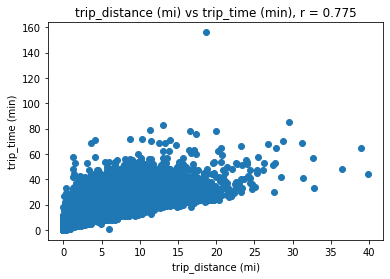

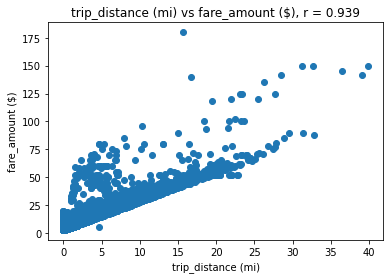

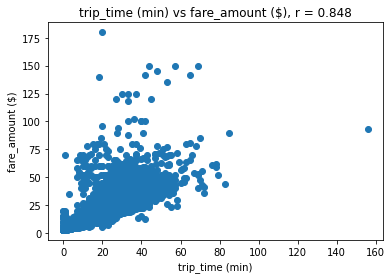

In [7]:
clean_df = df5

cols_of_interest = ["trip_distance", "trip_time", "fare_amount"]

correlations = clean_df.corr(numeric_only=True).loc[cols_of_interest, cols_of_interest]

pairs = [("trip_distance (mi)", "trip_time (min)"),
         ("trip_distance (mi)", "fare_amount ($)"),
         ("trip_time (min)", "fare_amount ($)")]

for pair in pairs:
    
    x_label, _ = pair[0].split()
    y_label, _ = pair[1].split()
    
    x, y = clean_df[x_label], clean_df[y_label]
    
    cor = correlations.at[x_label, y_label]
    
    plt.figure()
    plt.scatter(x, y)
    plt.title(f"{pair[0]} vs {pair[1]}, r = {cor:0.3f}")
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])


<!-- END QUESTION -->

# Q3
Using the cleaned dataset from Q1, we want to find a simple line that correlates two variables: *trip distance* and *fare amount*. Use the **scikit-learn** library to fit a line to the data. (**2 points**)

- Provide the regression coefficients of your model
- Write down your linear regression equation. 
- Use your model to predict the fare amount for a 3 miles trip. 

A visualization of the model is not required, but it would be nice to have and good practice.

$$
\text{Coefficients:} \\
\beta_0 = 3.73 \\
\beta_x = 2.86 \\
$$
$$
\text{Model:} \\
y = f(x) = 2.86 x + 3.73\\
x \equiv trip\,distance\,(mi)\\ 
y \equiv fare\,amount\,($)
$$

A trip of 3 miles would have a fare of about $12.32

<!-- BEGIN QUESTION -->



In [8]:
from sklearn.linear_model import LinearRegression

SLRmodel = LinearRegression()

X = clean_df.trip_distance.values.reshape(-1, 1)
y = clean_df.fare_amount.values.reshape(-1, 1)

SLRmodel.fit(X, y)


print("Coefficient:", SLRmodel.coef_[0][0], "Intercept:", SLRmodel.intercept_[0])

print(f"fare_amount = {SLRmodel.coef_[0][0]} * trip_distance + {SLRmodel.intercept_[0]}")


estimate = SLRmodel.predict([[3]])
print(f"fare_amount for a 3 mile trip should be ${estimate[0][0]:0.2f}")

Coefficient: 2.8628335913381004 Intercept: 3.733326323937746
fare_amount = 2.8628335913381004 * trip_distance + 3.733326323937746
fare_amount for a 3 mile trip should be $12.32


<!-- END QUESTION -->

# Q4
Using the cleaned dataset from Q1, fit a Multiple Linear Regression hyperplane into this data. We are interested to predict *total amount* using the *trip distance* and *travel time*. Use the **Scikit-learn** library. **(4 points)**

* Provide the regression coefficients of your model
* Write down your Multiple Linear Regression equation. 
* Use your model to predict the total amount for a 3 miles trip and 6 min travel time. 

A visualization of the model is not required, but it would be nice to have and good practice.

$$
\text{Coefficients:} \\
\beta_0 = 1.95 \\
\beta_{x_0} = 2.15 \\
\beta_{x_1} = 0.32 \\
$$
$$
\text{Model:} \\
y = f(x_0, x_1) = 2.15x_0 + 0.32x_1 + 1.95\\
x_0 \equiv trip\,distance\,(mi)\\
x_1 \equiv trip\,time\,(min)\\
y \equiv fare\,amount\,($)
$$

A trip of 3 miles and 6 mins would have a fare of about $10.30

<!-- BEGIN QUESTION -->



In [9]:
MLRmodel = LinearRegression()

X = clean_df[["trip_distance", "trip_time"]].values
y = clean_df.fare_amount.values.reshape(-1, 1)

MLRmodel.fit(X, y)

print("Coefficients:", MLRmodel.coef_[0], "Intercept:", MLRmodel.intercept_[0])

print(f"fare_amount = {MLRmodel.coef_[0][0]} * trip_distance + {MLRmodel.coef_[0][1]} * trip_time + {MLRmodel.intercept_[0]}")


estimate = MLRmodel.predict([[3, 6]])
print(f"fare_amount for a 3 mile trip and a 6 min trip time should be ${estimate[0][0]:0.2f}")

Coefficients: [2.15147155 0.31659243] Intercept: 1.9477299290847636
fare_amount = 2.1514715513582394 * trip_distance + 0.3165924294253586 * trip_time + 1.9477299290847636
fare_amount for a 3 mile trip and a 6 min trip time should be $10.30


<!-- END QUESTION -->

# Q5
Using the cleaned dataset from Q1, implement the gradient descent optimization to find the optimal parameters for our Simple Linear Regression model of task 3. **(6 points)**

* Define and set your learning rate (start with a very small number and increase it if your GC works)
* Instantiate all coefficients from zero
* Run a maximum of 400 interations. You can stop if your cost converges with a precision of 0.01 
* Print and visualize the optimization costs 
* Provide the Regression Coefficients of your model after stop or convergence. 

A visualization of the error vs. number of iteratons **is required**, unlike in Q3 and Q4.

$$
\text{Coefficients:} \\
\beta_0 = 3.72 \\
\beta_x = 2.87 \\
$$

$$
\text{Model:} \\
y = f(x) = 2.87 x + 3.72\\
x \equiv trip\,distance\,(mi)\\ 
y \equiv fare\,amount\,($) \\
$$

$$
\text{Hyperparameters:} \\
\epsilon = 0.00001 \\
\lambda = 0.1
$$

<!-- BEGIN QUESTION -->



In [10]:
def mse(y, predictions):
    """Calculate mean squared error."""
    return np.mean((y-predictions)**2)


def average_relative_error(y, predictions):
    """Calculate the average relative error for each sample in the 
    dataset. This is the precision score we can use to stop early."""
    relative_errors = abs(y-predictions)/abs(y)
    
    return np.mean(relative_errors)


def d_a(X, y, predictions):
    """Calculate gradient for a (the slope coefficient)."""
    return -np.mean((y-predictions) * X)


def d_b(y, predictions):
    """Calculate gradient for b (the y-intercept coefficient)."""
    return -np.mean((y-predictions))


In [11]:
# Use the functions above to compute your gradient descent for the up to 400 iterations.
maxiter = 400
lr = 0.1
epsilon = 0.00001

theta = []
costs = []

X = clean_df.trip_distance.values.reshape(-1, 1)
y = clean_df.fare_amount.values.reshape(-1, 1)

a = 0
b = 0
predictions = a * X + b

oldCost = 0

for i in range(maxiter):
    da = d_a(X, y, predictions)
    db = d_b(y, predictions)
    
    a -= lr*da
    b -= lr*db
    predictions = a * X + b
    
    cost = mse(y, predictions)
    
    theta.append((a, b))
    costs.append(cost)
    
    print(f"Iteration {i:3}: {a=:10f}, {b=:10f}, {cost=:10f}")
    
    if abs(oldCost-cost) <= epsilon:
        print(f"Ended Iteration {i}")
        break
    
    oldCost = cost
        
print("Gradient Descent:", a, b)
print("SLRMmodel:", SLRmodel.coef_[0][0], SLRmodel.intercept_[0])   

Iteration   0: a=  6.215483, b=  1.267586, cost=161.298622
Iteration   1: a=  1.072469, b=  0.466904, cost=112.353810
Iteration   2: a=  5.250542, b=  1.352797, cost= 79.325054
Iteration   3: a=  1.782824, b=  0.845009, cost= 57.017175
Iteration   4: a=  4.589902, b=  1.471200, cost= 41.932423
Iteration   5: a=  2.250401, b=  1.157934, cost= 31.715729
Iteration   6: a=  4.135044, b=  1.606777, cost= 24.781277
Iteration   7: a=  2.555449, b=  1.422036, cost= 20.061117
Iteration   8: a=  3.819568, b=  1.749181, cost= 16.835942
Iteration   9: a=  2.751910, b=  1.648744, cost= 14.621172
Iteration  10: a=  3.598705, b=  1.891851, cost= 13.090266
Iteration  11: a=  2.876029, b=  1.846137, cost= 12.023097
Iteration  12: a=  3.442251, b=  2.030734, cost= 11.271199
Iteration  13: a=  2.952138, b=  2.020003, cost= 10.734366
Iteration  14: a=  3.329813, b=  2.163439, cost= 10.344905
Iteration  15: a=  2.996559, b=  2.174559, cost= 10.057029
Iteration  16: a=  3.247607, b=  2.288665, cost=  9.8397

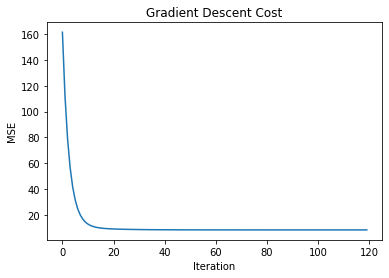

In [12]:
# Visualize optimization costs over the iterations
plt.plot(costs)
plt.title("Gradient Descent Cost")
plt.xlabel("Iteration")
_ = plt.ylabel("MSE")

<!-- END QUESTION -->

